<a href="https://colab.research.google.com/github/rakenputra/machine-learning/blob/main/Week%206/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Gantilah 'nama_file.csv' dengan nama file dataset yang Anda inginkan
file_path = '/content/drive/My Drive/Dataset/Mall_Customers.csv'

# Membaca dataset dari file CSV
dataset = pd.read_csv(file_path)

# Mengubah dataset menjadi dataframe
df = pd.DataFrame(dataset)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Mengubah nama atribut/kolom
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
print(df.head())

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [5]:
# Menghapus kolom 'CustomerID' dan 'Gender'
df = df.drop(['CustomerID', 'Gender'], axis=1)
print(df.head())

   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

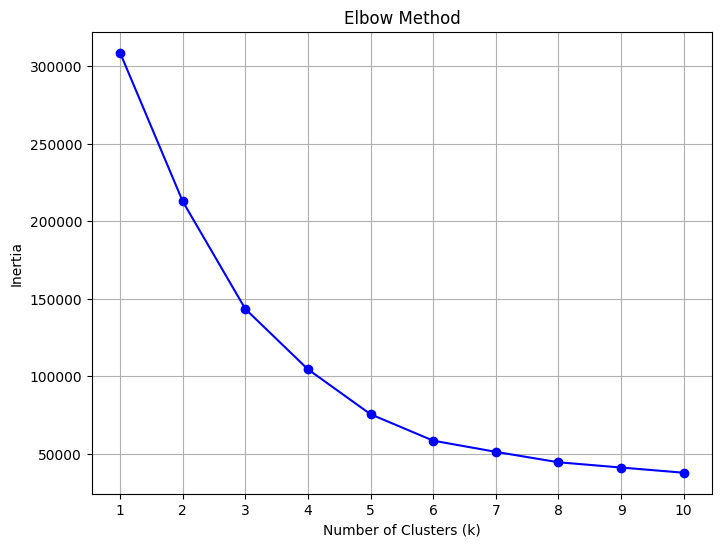

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Kolom yang akan digunakan untuk clustering
features = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar untuk menyimpan nilai inersia (inertia) K-Means
inertia = []

# Mencoba jumlah kluster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Memplot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


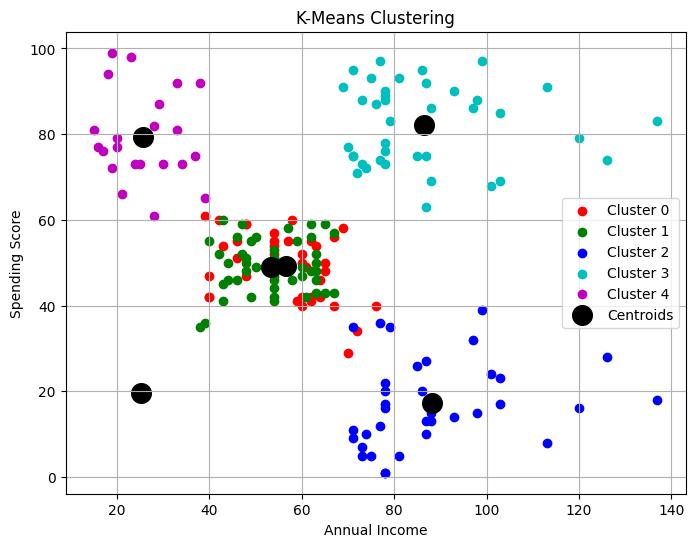

In [7]:
# Kolom yang akan digunakan untuk clustering
features = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means dengan 5 kluster
kmeans = KMeans(n_clusters=6, random_state=0)
df['label'] = kmeans.fit_predict(features)

# Visualisasi berdasarkan label kluster
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm']
for label, color in zip(range(5), colors):
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], c=color, label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='k', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

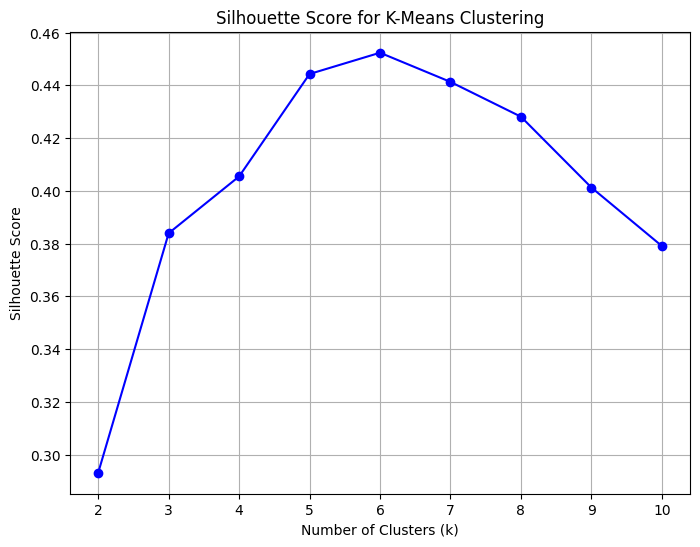

Silhouette Score for k=2: 0.2932
Silhouette Score for k=3: 0.3839
Silhouette Score for k=4: 0.4055
Silhouette Score for k=5: 0.4443
Silhouette Score for k=6: 0.4523
Silhouette Score for k=7: 0.4413
Silhouette Score for k=8: 0.4281
Silhouette Score for k=9: 0.4013
Silhouette Score for k=10: 0.3791


In [8]:
from sklearn.metrics import silhouette_score
import numpy as np

# Daftar untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Mencoba jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, labels)
    silhouette_scores.append(silhouette_avg)

# Memplot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Menampilkan nilai Silhouette Score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")

In [12]:
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Kolom yang akan digunakan untuk clustering
features = df[['Age', 'Annual Income', 'Spending Score']]

# Daftar untuk menyimpan nilai Davies-Bouldin Index
davies_bouldin_scores = []

# Mencoba jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(features)
    davies_bouldin_score_value = davies_bouldin_score(features, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

# Menampilkan nilai Davies-Bouldin Index
for k, score in zip(range(2, 11), davies_bouldin_scores):
    print(f"Davies-Bouldin Index for k={k}: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.3571
Davies-Bouldin Index for k=3: 0.8748
Davies-Bouldin Index for k=4: 0.8915
Davies-Bouldin Index for k=5: 0.8219
Davies-Bouldin Index for k=6: 0.7470
Davies-Bouldin Index for k=7: 0.7864
Davies-Bouldin Index for k=8: 0.8641
Davies-Bouldin Index for k=9: 0.9070
Davies-Bouldin Index for k=10: 0.9574


In [11]:
from sklearn.metrics import calinski_harabasz_score

# Daftar untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = []

# Mencoba jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(features)
    calinski_harabasz_score_value = calinski_harabasz_score(features, labels)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)

# Menampilkan nilai Calinski-Harabasz Index
for k, score in zip(range(2, 11), calinski_harabasz_scores):
    print(f"Calinski-Harabasz Index for k={k}: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.2810
Calinski-Harabasz Index for k=3: 113.7051
Calinski-Harabasz Index for k=4: 127.9838
Calinski-Harabasz Index for k=5: 151.0439
Calinski-Harabasz Index for k=6: 166.7205
Calinski-Harabasz Index for k=7: 162.2852
Calinski-Harabasz Index for k=8: 163.5806
Calinski-Harabasz Index for k=9: 156.1551
Calinski-Harabasz Index for k=10: 152.2643
